## Exploratory Data Analysis of Mutual Funds of India - March 2023

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset contains below columns
- scheme_name: The name of the mutual fund scheme
- min_sip: The minimum amount required for a Systematic Investment Plan (SIP) investment in the fund
- min_lumpsum: The minimum amount required for a lump sum investment in the fund
- expense_ratio: The expense ratio of the fund
- fund_size_cr: The size of the fund in crore (10 million) units
- fund_age_yr: The age of the fund in years
- fund_manager: The name of the fund manager
- sortino: The Sortino ratio of the fund, which measures the risk-adjusted return of the fund
- alpha: The alpha of the fund, which measures the excess return of the fund compared to its benchmark
- sd: The standard deviation of the fund's returns
- beta: The beta of the fund, which measures the sensitivity of the fund's returns to the market
- sharpe: The Sharpe ratio of the fund, which measures the risk-adjusted return of the fund relative to a risk-free asset
- risk_level: The risk level of the fund, categorized as Very High,High, Moderately High, Moderately Low, or Low
- amc_name: The name of the asset management company that manages the fund
- rating: The rating of the fund on a scale of 1 to 5, with 1 being the lowest and 5 being the highest
- category: The category of the fund, such as Equity, Debt, or Hybrid
- sub_category: The sub-category of the fund, such as Large Cap, Small Cap, Floater Mutual Funds, etc.
- returns_1yr: The return of the fund in the past year
- returns_3yr: The return of the fund in the past 3 years
- returns_5yr: The return of the fund in the past 5 years

In [ ]:
# loading the csv file
df= pd.read_csv('/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv',na_values='-')
df.head()

In [ ]:
df['risk_level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)

In [ ]:
# checking the size of data (rows,columns)
df.shape

In [ ]:
# checking for missing values and column datatypes are correct
df.info()

In [ ]:
# checking for missing values
df.isnull().sum()

We will try to find why sortino, alpha, sd,beta,share,returns_3yr and returns_5yr data is missing

In [ ]:
# checking for duplicate rows if any
df.duplicated().sum()

In [ ]:
# Lets investigate why there are missing values in returns_3yr and returns_5yr
df[df['returns_3yr'].isnull()]

We find that there are missing values in sortino, alpha,beta,sd,sharpe, returns_3yr and returns_5yr since fund age is less than 3 years
It seems that sortino, alpha,beta,sd,sharpe ratios are calculated considering 3 years data

In [ ]:
df[df['returns_5yr'].isnull()]

Clearly missing values in returns_5yr is there as fund age is not greater than 5 years

In [ ]:
# mean returns across category
mean_returns_by_category = df.groupby('category')['returns_3yr','returns_5yr'].mean()
mean_returns_by_category

In [ ]:
# mean performance ratios across category
mean_ratios_by_category = df.groupby('category')['sortino','alpha','sd','beta','sharpe'].mean()
mean_ratios_by_category

In [ ]:
# imputing missing values with mean of category

df['returns_3yr'] = df.groupby('category')['returns_3yr'].apply(lambda x: x.fillna(x.mean()))
df['returns_5yr'] = df.groupby('category')['returns_5yr'].apply(lambda x: x.fillna(x.mean()))
df['sortino'] = df.groupby('category')['sortino'].apply(lambda x: x.fillna(x.mean()))
df['alpha'] = df.groupby('category')['alpha'].apply(lambda x: x.fillna(x.mean()))
df['sd'] = df.groupby('category')['sd'].apply(lambda x: x.fillna(x.mean()))
df['beta'] = df.groupby('category')['beta'].apply(lambda x: x.fillna(x.mean()))
df['sharpe'] = df.groupby('category')['sharpe'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# verifying missing values are imputed
df.isnull().sum()

In [ ]:
# checking statistics of numerical columns
df.describe()

There seems to be presence of outliers in columns min_lumpsum, fund_size_cr as mean and median differ significantly

In [ ]:
df.head()

## Analysis on fund_manager

In [ ]:
# fund manager with highest returns in 5 years

df.groupby(['fund_manager'])['returns_5yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')

plt.show()

In [ ]:
# creating category wise dataframes

debt_df = df[df['category'] == 'Debt']
equity_df = df[df['category'] == 'Equity']
hybrid_df = df[df['category'] == 'Hybrid']
other_df = df[df['category'] == 'Other']
solution_df = df[df['category'] == 'Solution Oriented']

In [ ]:
# calculating top 5 fund manager with avg highest returns in each category

top_5_debt = debt_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_equity = equity_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_hybrid = hybrid_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_solution = solution_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_other = other_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()

In [ ]:
# create the plot
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(14, 4),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0],color='#F1DC2F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1],color='#F1512F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2],color='#27AF17')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_solution, ax=ax[3],color='#17AFA3')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[4],color='#AF178A')

# set plot title and x labels
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
ax[3].set_title('Solution Funds Returns')
ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
ax[4].set_title('Other Funds Returns')
ax[4].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')

# show the plot
plt.tight_layout()
plt.suptitle('Top 5 fund manager in each category by average 5 year of returns')
plt.subplots_adjust(top=0.8)
plt.show()

Conclusion
- There are 3 fund manager in Debt Funds having higher returns among top 5 fund manager.
- In the Equity category Vaibhav Dusad has managed to give highest returns.
- In the Hybrid category Vasav Sahgal has managed to give highest returns.
- In the Solution Funds category Srinivasan Ramamurthy has managed to give highest returns.
- In the Other Funds category Devender Singhal has managed to give highest returns.

In [ ]:
# top 10 fund manager by the number of schemes

df['fund_manager'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of schemes')
plt.title('Top 10 fund manager by No of schemes')
plt.show()

Conclusion
- Rohit Seksaria is managing the highest number of Funds.

In [ ]:
# top 10 fund manager by the mean age of funds
df.groupby(['fund_manager'])['fund_age_yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Age of funds in year')
plt.title('Top 10 fund manager by oldest schemes')
plt.show()

Conclusion
- George Thomas is managing a fund which is the oldest among our dataset.

In [ ]:
# top 10 fund manager by the assets under management
df.groupby(['fund_manager'])['fund_size_cr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Fund value in Crore')
plt.title('Top 10 fund manager having highest assets under management')
plt.show()


Conclusion
- Anupam Joshi has the highest AUM.

## Analysis on min_sip and min_lumpsum

In [ ]:
# distribution of min_sip
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_sip'],ax=ax[0],kde=True)
sns.boxplot(df['min_sip'],ax=ax[1])

Conclusion
- Most of the funds have Minimum SIP amount as 0,500 and 1000

In [ ]:
# distribution of min_lumpsum
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_lumpsum'],ax=ax[0],kde=True)
sns.boxplot(df['min_lumpsum'],ax=ax[1])

Conclusion
- Most of the funds have Minimum Lumpsum amount between 0 to 5000

In [ ]:
# distribution of min_sip and min_lumpsum by category type
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.boxplot(data = df,y=df['category'],x=df['min_lumpsum'],ax=axes[0])
sns.boxplot(data = df,y=df['category'],x=df['min_sip'],ax=axes[1])

axes[0].set_title('Lumpsum investment required by Category type')
axes[1].set_title('SIP investment required by Category type')
plt.subplots_adjust(bottom=4,top=5)
plt.show()

Conclusion
- Across fund type lumpum investment is almost same.
- Across fund type sip investment is high among Hybrid and Debt funds.

In [ ]:
# distribution of min_sip,min_lumpsum by sub_category type

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16),sharey='row')

sns.boxplot(equity_df,y='sub_category',x='min_lumpsum',ax=axes[0,0])
sns.boxplot(hybrid_df,y='sub_category',x='min_lumpsum',ax=axes[1,0])
sns.boxplot(solution_df,y='sub_category',x='min_lumpsum',ax=axes[2,0])
sns.boxplot(other_df,y='sub_category',x='min_lumpsum',ax=axes[3,0])
sns.boxplot(debt_df,y='sub_category',x='min_lumpsum',ax=axes[4,0])

axes[0,0].set_title('Minimum Lumpsum Investment of Equity fund by sub-Category')
axes[1,0].set_title('Minimum Lumpsum Investment of Hybrid fund by sub-Category')
axes[2,0].set_title('Minimum Lumpsum Investment of Solution Oriented fund by sub-Category')
axes[3,0].set_title('Minimum Lumpsum Investment of Other fund by sub-Category')
axes[4,0].set_title('Minimum Lumpsum Investment of Debt fund by sub-Category')


sns.boxplot(equity_df,y='sub_category',x='min_sip',ax=axes[0,1])
sns.boxplot(hybrid_df,y='sub_category',x='min_sip',ax=axes[1,1])
sns.boxplot(solution_df,y='sub_category',x='min_sip',ax=axes[2,1])
sns.boxplot(other_df,y='sub_category',x='min_sip',ax=axes[3,1])
sns.boxplot(debt_df,y='sub_category',x='min_sip',ax=axes[4,1])

axes[0,1].set_title('Minimum SIP Investment of Equity fund by sub-Category')
axes[1,1].set_title('Minimum SIP Investment of Hybrid fund by sub-Category')
axes[2,1].set_title('Minimum SIP Investment of Solution Oriented fund by sub-Category')
axes[3,1].set_title('Minimum SIP Investment of Other fund by sub-Category')
axes[4,1].set_title('Minimum SIP Investment of Debt fund by sub-Category')

plt.subplots_adjust(bottom=2.5,top=4,left=2,right=3)
plt.show()

## Analysis on expense ratio
- The expense ratio measures how much of a fund's assets are used for administrative and other operating expenses. 
- A mutual fund expense ratio that is at or below its peer average is ideal. 

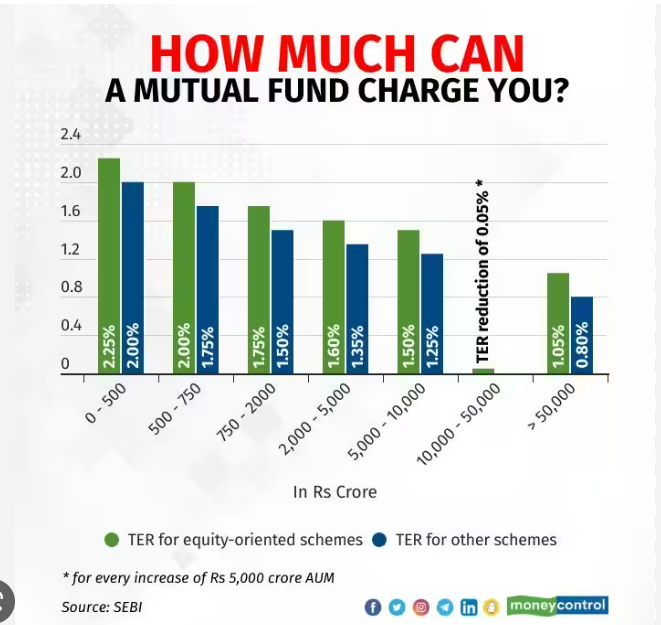

In [ ]:
# create a function to make a category columns with above fund size

def fund_size_group(fund_size):
    if fund_size >= 0.0 and fund_size <= 500.0:
        return '0-500'
    elif fund_size > 500.0 and fund_size <= 750.0:
        return '500-750'
    elif fund_size > 750.0 and fund_size <= 2000.0:
        return '750-2000'
    elif fund_size > 2000.0 and fund_size <= 5000.0:
        return '2000-5000'
    elif fund_size > 5000.0 and fund_size <= 10000.0:
        return '5000-10000'
    elif fund_size > 10000.0 and fund_size <= 50000.0:
        return '10000-50000'
    else:
        return '>50000'

In [ ]:
# create a column with above fund size group
df['fund_size_group'] = df['fund_size_cr'].apply(fund_size_group)

In [ ]:
# expense ratio variation with fund size group across different category

# Create the categorical plot with subplots
g = sns.catplot(data=df, x='fund_size_group', y='expense_ratio', kind='bar', col='category', col_wrap=3)

# Set the rotation of the x-axis tick labels for all subplots
g.set_xticklabels(rotation='vertical')

# set the super title
plt.suptitle('Expense Ratio variation across different Fund size group and category',fontsize=20)
plt.subplots_adjust(top=0.8)

# Show the plot
plt.show()

Findings:
- Large fund size does have low expense ratio.

- Debt has the lowest 'expense ratio' amongs the funds.

In [ ]:
# expense ratio distribution
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['expense_ratio'],ax=ax[0],kde=True)
sns.boxplot(df['expense_ratio'],ax=ax[1])

Conclusion
- Expense ratio of most of the schemes lies between 0 to 1

In [ ]:
# distribution of expense ratio by category type
plt.figure(figsize=(10,8))
sns.boxplot(df,y=df['category'],x=df['expense_ratio'])
plt.show()

Conclusion 
- Equity and Solution oriented funds have the highest expense ratio among funds.

In [ ]:
# distribution of expense ratio by sub-category type
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 16))

sns.boxplot(equity_df,y='sub_category',x='expense_ratio',ax=axes[0])
sns.boxplot(hybrid_df,y='sub_category',x='expense_ratio',ax=axes[1])
sns.boxplot(solution_df,y='sub_category',x='expense_ratio',ax=axes[2])
sns.boxplot(other_df,y='sub_category',x='expense_ratio',ax=axes[3])
sns.boxplot(debt_df,y='sub_category',x='expense_ratio',ax=axes[4])

axes[0].set_title('Expense Ratio of Equity fund by sub-Category type')
axes[1].set_title('Expense Ratio of Hybrid fund by sub-Category type')
axes[2].set_title('Expense Ratio of Solution Oriented fund by sub-Category type')
axes[3].set_title('Expense Ratio of Other fund by sub-Category type')
axes[4].set_title('Expense Ratio of Debt fund by sub-Category type')

plt.subplots_adjust(bottom=2.5,top=4)
plt.show()

Conclusion 

Equity type -
- Among equity type Sectoral and Dividend Yield funds have the highest expense ratio.

Hybrid type- 
- Among hybrid type Arbitrage Funds have the Lowest expense ratio.

Solution Oriented - 
- Chilren Funds have the highest expense ratio.

Other Fund-
- FOFs Overseas has the highest expense Ratio.

Debt Fund-
- Among debt fund Credit Risk Funds has the highest expense ratio.

In [ ]:
# expense ratio vs rating

sns.boxplot(df,x='rating',y='expense_ratio')
plt.title('Variation of expense ratio across rating')
plt.show()

Findings - 
- For higher rating funds, expense ratio is less.
- We will check category distribution with rating to learn more.

In [ ]:
# Lets find why 0 rating fund has high expense ratio
pd.crosstab(df['rating'],df['category'],margins=True)

Findings
- Clearly 0 rating fund has more equity category=72% and equity fund has high expense ratio. 

In [ ]:
# expense ratio vs risk level

sns.boxplot(df,x='risk_level',y='expense_ratio')
plt.title('Variation of expense ratio across risk level')
plt.xticks(rotation='vertical')
plt.show()

Conclusion
- Expense ratio is high for very high risk. We can check which category mostly falls in high risk as it has to be Equity.

In [ ]:
# Lets find why very high risk fund has high expense ratio
pd.crosstab(df['risk_level'],df['category'],margins=True)

Findings
- Most of the Very high risk funds are from Equity and equity fund has high expense ratio.

## Analysis on fund size

In [ ]:
# distribution of fund size
sns.histplot(df['fund_size_cr'])
plt.title('Fund Size Distribution')
plt.show()

Findings
- Most of the fund size is less than 2000 Cr.

In [ ]:
# fund size across fund age

#plt.figure(figsize=(12,8))
sns.boxplot(df,x='fund_size_cr',y='fund_age_yr',orient='h')
plt.title('Fund size variations with fund age')
plt.show()

Conclusion 
- 10 years old fund has maximum fund size.

In [ ]:
# fund size vs rating 

#plt.figure(figsize=(12,8))
sns.boxplot(df,x='fund_size_cr',y='rating',orient='h')
plt.title('Fund size variation with the rating')
plt.show()

Conclusion 
- People seems to be interested in investing higher rated funds. We will see if ratings have any impact on returns in further slides.

In [ ]:
# fund size vs risk level

#plt.figure(figsize=(12,8))
sns.boxplot(df[df['fund_size_cr']<10000],x='fund_size_cr',y='risk_level',orient='h')
plt.title('Fund size variations with Risk level')
plt.show()

Conclusion 
- Most of the funds are invested in risk level High and Very High

In [ ]:
# top 10 AMC by sum of funds managed
df.groupby('amc_name')['fund_size_cr'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Total Funds managed in Crore')
plt.title('Funds managed by AMC across all schemes')
plt.show()

Conlusion: 
- ICICI Prudential Mutual Fund has received the highest funds collectively. (Popular AMC)

In [ ]:
# category wise fund 
plt.figure(figsize=(10,8))
sns.boxplot(df,y='category',x='fund_size_cr')
plt.title('Funds variation across category')
plt.show()

Conlusion 
- Most of the funds are invested in Equity funds. (Popular category Debt and Equity)

In [ ]:
# sub category wise fund

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8),sharex='col')

sns.boxplot(equity_df,y='sub_category',x='fund_size_cr',ax=axes[0])
sns.boxplot(hybrid_df,y='sub_category',x='fund_size_cr',ax=axes[1])
sns.boxplot(solution_df,y='sub_category',x='fund_size_cr',ax=axes[2])
sns.boxplot(other_df,y='sub_category',x='fund_size_cr',ax=axes[3])
sns.boxplot(debt_df,y='sub_category',x='fund_size_cr',ax=axes[4])

axes[0].set_title('Fund size of Equity fund by sub-Category type')
axes[1].set_title('Fund size of Hybrid fund by sub-Category type')
axes[2].set_title('Fund size of Solution Oriented fund by sub-Category type')
axes[3].set_title('Fund size of Other fund by sub-Category type')
axes[4].set_title('Fund size of Debt fund by sub-Category type')

plt.subplots_adjust(bottom=10, top=12)
plt.show()

Conclusion

Equity-
- Mid cap, Flexi Cap and Contra get more funds. (Popular Sub-category in Equity)

Hybrid-
- Balanced and Arbitrage get more funds. (Popular Sub-category in Hybrid)

Debt-
- Money market and Liquid mutual funds get more funds. (Popular Sub-category in Debt)

In [ ]:
# schemes with high fund also has high returns (schemes giving higher returns will lead to funds inflow)

sns.catplot(df,y='fund_size_group',x='returns_5yr',col='category',col_wrap=3,kind='bar')
plt.subplots_adjust(top=0.8)
plt.suptitle('Returns variations with Fund size',fontsize=15)
plt.show()

Conclusion 
- Except Debt category all other are funds returns are related to fund size. 
- We found that as fund size increases expense ratio decreases

## Analysis on fund age 

In [ ]:
# distribution of fund age
sns.histplot(df['fund_age_yr'])
plt.title('Distribution of Fund Age')
plt.show()

In [ ]:
sns.histplot(df,x='fund_age_yr',hue='category',kde=True)
plt.title('Distribution of Fund Age')
plt.show()

Findings
- Recent funds are mostly Debt funds
- More than 4 year age funds are Equity type followed by Debt.

In [ ]:
# can we say that new funds give better returns ?

sns.catplot(df,x='returns_5yr',y='fund_age_yr',orient='h',kind='box',col='category',col_wrap=3)
plt.subplots_adjust(top=0.8)
plt.suptitle('Returns variations with Fund age',fontsize=15)
plt.show()

Conclusion
- It seems there is no dependency of returns on fund age. Though older funds have more data which we can analyse before investing.

## Analysis on risk level

In [ ]:
# total no of schemes in each risk level
sns.countplot(df,x='risk_level')
plt.title('Number of funds across Risk level')
plt.ylabel('Number of funds')
plt.xticks(rotation='vertical')
plt.show()

Conclusion
- Most of the schemes have risk level Very High

In [ ]:
# amc and risk level
plt.figure(figsize=(14,10))
sns.heatmap(pd.crosstab(df['amc_name'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('AMC wise schemes distribution across risk level in percentage')
plt.show()

Conclusion
- Most of the AMCs have schemes with risk level 6(Very High).
- Taurus, Shriram and L&T have 100% in Very High Risk category.

In [ ]:
# category and risk level
sns.heatmap(pd.crosstab(df['category'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across category and risk level')
plt.show()

Findings
- Low, Moderate and Moderately Low are dominated by Debt Funds
- Moderately High, High and very High are dominated by Equity Funds

In [ ]:
# rating and risk level
sns.heatmap(pd.crosstab(df['rating'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across rating and risk level')
plt.show()

Findings -
- 0 rating funds have major concentration of Very High risk funds.

In [ ]:
sns.heatmap(pd.pivot_table(data=df,index='rating',columns='risk_level',values='returns_5yr'),annot=True,fmt='.3g')
plt.title('Variations of 5 years returns across rating and risk level')
plt.show()

Findings - 
- 0 rating funds has high return as in the above cell you can see most 0 rated funds are in equity.
- For risk level 5 and 6 as high rated fund should be chosen as returns are 13.4% and 15.4% respectively.

In [ ]:
# high risk level means high returns ??

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(df,x='risk_level',y='returns_1yr',ax=axes[0])
sns.barplot(df,x='risk_level',y='returns_3yr',ax=axes[1])
sns.barplot(df,x='risk_level',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[0].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[1].set_title('Returns over 3 year')
axes[1].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[2].set_title('Returns over 5 year')
axes[2].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())

plt.tight_layout()
plt.show()

Findings - 
- In 3 and 5 years returns have a positive relation with risk level.
- It clearly shows that high risk funds should be held for longer time to get more returns.

## Analysis on AMC

In [ ]:
# distribution of amc
plt.figure(figsize=(10,8))
sns.countplot(df,y='amc_name')
plt.title('Number of schemes vs AMC')
plt.xlabel('Number of schemes')
plt.show()

Findings- ICICI has around 57 schemes running

In [ ]:
# avg rating of amc funds
plt.figure(figsize=(10,8))
sns.barplot(df,y='amc_name',x='rating')
plt.title('Avg rating across AMC')
plt.xlabel('Avg rating')
plt.show()

Findings - 
Quant Mutual Funds have the highest rating.

In [ ]:
# amc name vs category
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['amc_name'],df['category'],normalize='index'),annot=True,fmt='.1%')
plt.title('Percent of schemes by AMC across category')
plt.show()

Findings - 
- Most of the AMC have funds in Debt and Equity category.

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.pivot_table(df,index='amc_name',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg of 5 years returns by AMC across category')
plt.show()

Findings- 
- Highest return of 13% in debt category is given by Navi Mutual Fund. (Though there was 1 debt fund by Navi)
- Highest return of 19% in Equity category is given by Quant Mutual Fund.
- Highest Return of 20% in Hybrid category is given by Quant Mutual Fund.

In [ ]:
# amc name vs sub-category
plt.figure(figsize=(22,20))
sns.heatmap(pd.crosstab(df['amc_name'],df['sub_category']),annot=True)
plt.title('Number of schemes by AMC across sub-category')
plt.show()

Findings 
- Most of schemes are opened in Sectoral/Thematic sub category.

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='amc_name',columns='sub_category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by AMC across different sub-category')
plt.show()

Findings - 
Quant Mutual Funds have performed very well across different Sub categories.

## Analysis of Rating

In [ ]:
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.show()

In [ ]:
# does returns vary because of ratings ??

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(df,x='rating',y='returns_1yr',ax=axes[0])
sns.barplot(df,x='rating',y='returns_3yr',ax=axes[1])
sns.barplot(df,x='rating',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[1].set_title('Returns over 3 year')
axes[2].set_title('Returns over 5 year')

plt.tight_layout()
plt.show()

Findings - 
- Except for 0 rating there is direct correlation in returns. As only in 0 rating, Equity funds are more than Debt funds
- Leaving 0 rating category, we can say that higher the rating higher returns.

In [ ]:
# lets check why 0 rating is giving higher returns
sns.heatmap(pd.crosstab(df['rating'],df['category'],normalize='index'),annot=True,fmt='.1%')

Findings
- Equity constitutes 72% in 0 rating
- Other ratings has somewhat equal distribution.

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='rating',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by Rating and Category')
plt.show()

Findings
- Leaving 0 rating category, we can say that higher the rating higher returns.

In [ ]:
sns.barplot(df,x='category',y='rating')
plt.title('Avg Rating across category')
plt.show()

## Analysis on category

In [ ]:
# distribution of category
sns.countplot(df,x='category')
plt.title('Number of schemes across category')
plt.ylabel('Number of schemes')
plt.show()

Findings - 
Among category most of the schemes are Equity or Debt type

In [ ]:
sns.barplot(df,x='category',y='returns_5yr')
plt.title('Avg 5 years returns across category')
plt.ylabel('Average of 5 years returns')
plt.show()

Findings - 
Equity has given highest return

In [ ]:
# sub category vs category

plt.figure(figsize=(8,10))
sns.heatmap(pd.crosstab(df['sub_category'],df['category']),annot=True,fmt='g')
plt.title('Number of schemes across sub-category by category ')
plt.show()

Findings:
- Most of the debt funds is Liquid Mutual Funds
- Most of the Equity funds is Sectoral/Thematic
- Most of the funds in Hybrid category is Aggressive Hybrid Mutual funds
- Most of the Other category funds is FOFs domestic
- Solution Oriented fund includes only Retirement funds

In [ ]:
# category wise returns

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),sharey='row')

# Create a bar plot for each axis
sns.barplot(df,x='category',y='returns_1yr',ax=axes[0])
sns.barplot(df,x='category',y='returns_3yr',ax=axes[1])
sns.barplot(df,x='category',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[0].set_xticklabels(df['category'].unique(),rotation='vertical')
axes[1].set_title('Returns over 3 year')
axes[1].set_xticklabels(df['category'].unique(),rotation='vertical')
axes[2].set_title('Returns over 5 year')
axes[2].set_xticklabels(df['category'].unique(),rotation='vertical')

plt.show()

Findings 
- Debt has been good in 1 year returns
- For 3 and 5 year Equity has outperformed other categories.

## Analysis of sub category

In [ ]:
# distribution of sub category
plt.figure(figsize=(10,8))
sns.countplot(df,y='sub_category')
plt.title('Number of schemes by sub-category')
plt.xlabel('Number of Schemes')
plt.show()

Findings
- Most popular sub-category are Sectoral/Thematic and ELSS Mutual Funds

In [ ]:
# returns of debt category and various sub category over 1 year, 3 year, 5 year

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(debt_df,x='sub_category',y='returns_1yr',ax=axes[0])
sns.barplot(debt_df,x='sub_category',y='returns_3yr',ax=axes[1])
sns.barplot(debt_df,x='sub_category',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year for debt funds')
axes[0].set_xticklabels(debt_df['sub_category'].unique(),rotation='vertical')
axes[1].set_title('Returns over 3 year for debt funds')
axes[1].set_xticklabels(debt_df['sub_category'].unique(),rotation='vertical')
axes[2].set_title('Returns over 5 year for debt funds')
axes[2].set_xticklabels(debt_df['sub_category'].unique(),rotation='vertical')

plt.tight_layout()
plt.show()

Findings
- Over 1 year best sub-category in Debt Category is Credit Risk Funds
- Over 3 year best sub-category in Debt Category is Fixed Maturity Plans
- Over 5 year best sub-category in Debt Category is Fixed Maturity Plans

In [ ]:
# returns of equity category and various sub category over 1 year, 3 year, 5 year

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(equity_df,x='sub_category',y='returns_1yr',ax=axes[0])
sns.barplot(equity_df,x='sub_category',y='returns_3yr',ax=axes[1])
sns.barplot(equity_df,x='sub_category',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year for equity fund')
axes[0].set_xticklabels(equity_df['sub_category'].unique(),rotation='vertical')
axes[1].set_title('Returns over 3 year for equity fund')
axes[1].set_xticklabels(equity_df['sub_category'].unique(),rotation='vertical')
axes[2].set_title('Returns over 5 year for equity fund')
axes[2].set_xticklabels(equity_df['sub_category'].unique(),rotation='vertical')

plt.tight_layout()
plt.show()

Findings
- Over 1 year best sub-category in Equity Category is Contra Funds
- Over 3 year best sub-category in Equity Category is Small Cap Funds
- Over 5 year returns do not differ much.

In [ ]:
# returns of hybrid category and various sub category over 1 year, 3 year, 5 year

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(hybrid_df,x='sub_category',y='returns_1yr',ax=axes[0])
sns.barplot(hybrid_df,x='sub_category',y='returns_3yr',ax=axes[1])
sns.barplot(hybrid_df,x='sub_category',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year for Hybrid Fund')
axes[0].set_xticklabels(hybrid_df['sub_category'].unique(),rotation='vertical')
axes[1].set_title('Returns over 3 year for Hybrid Fund')
axes[1].set_xticklabels(hybrid_df['sub_category'].unique(),rotation='vertical')
axes[2].set_title('Returns over 5 year for Hybrid Fund')
axes[2].set_xticklabels(hybrid_df['sub_category'].unique(),rotation='vertical')

plt.tight_layout()
plt.show()

Findings
- Over 1 year best sub-category in Hybrid Category is Arbitrage and Conservative Funds
- Over 3 year best sub-category in Hybrid Category is Aggressive and Multi Asset Allocation
- Over 5 year best sub-category in Hybrid Category is Aggressive and Multi Asset Allocation

In [ ]:
# returns of other category and various sub category over 1 year, 3 year, 5 year

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(other_df,x='sub_category',y='returns_1yr',ax=axes[0])
sns.barplot(other_df,x='sub_category',y='returns_3yr',ax=axes[1])
sns.barplot(other_df,x='sub_category',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year for Other Funds')
axes[1].set_title('Returns over 3 year for Other Funds')
axes[2].set_title('Returns over 5 year for Other Funds')

plt.tight_layout()
plt.show()

Findings
- Over 1 year best sub-category in Other Category is FoFs Domestic, also FoFs overseas has given negative return
- Over 3 year best sub-category in Other Category is Index Funds
- Over 5 year best sub-category in Other Category is FoFs Domestic and Index Funds

In [ ]:
# returns of solution oriented category and various sub category over 1 year, 3 year, 5 year


# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(solution_df,x='sub_category',y='returns_1yr',ax=axes[0])
sns.barplot(solution_df,x='sub_category',y='returns_3yr',ax=axes[1])
sns.barplot(solution_df,x='sub_category',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year for Solution Funds')
axes[1].set_title('Returns over 3 year for Solution Funds')
axes[2].set_title('Returns over 5 year for Solution Funds')

plt.tight_layout()
plt.show()

Findings
- Over 1 year best sub-category in Solution Category is Retirement Funds
- Over 3 year best sub-category in Solution Category is Children Funds
- Over 5 year returns do not differ much

## Analysis on alpha
Alpha is defined as the excess return of the mutual fund over the benchmark return, on a risk-adjusted basis.

Risk-adjusted basis means we need to –

Calculate the difference between the mutual fund returns and the risk-free return.
Calculate the difference between the benchmark return and the risk-free return, multiply this by the beta.
Take the difference between 1 and 2

Mathematically,

Alpha = (MF Return – riskfree return) – (Benchmark return – riskfree return)*Beta

Lets put this in context with an example. Assume a certain fund gives you a return of 10%, its benchmark returns for the same duration is 7%. The beta of the fund is 0.75. What do you think the alpha assuming the risk-free rate is 4%?

Let’s apply the for formula and check –

Alpha = (10%-4%)-(7%-4%)*0.75
= 6% – 2.25%
= 3.75% or 0.0375

As you can see, the alpha is not just the difference between the fund and its benchmark, which if true, the alpha would have been –
10% – 7%
=3%

But rather, the alpha is 3.75%.

The fund has managed to generate a 10% return compared to the Index’s 7% while managing to stay significantly less volatile (remember beta is just 0.75). Hence we are rewarding the fund for its good behaviour or less volatile behaviour. Therefore the alpha is 3.75% as opposed to just 3%.

Now, imagine the same fund, with the same returns, but the beta is 1.3 instead of 0.75. What do you think is the alpha?
By now, you should guess that since the beta is high, the fund gets penalised for its erratic behaviour. Therefore the alpha should be lower.

Let us see if the numbers agree to this thought.

Alpha = (10%-4%)-(7%-4%)*1.3
= 6% – 3.9%
= 2.1%

See that? While the returns remain the same, thanks to beta, the alpha is significantly lesser on a risk-adjusted basis.

To conclude, alpha is the excess return of the fund over above the benchmark returns. Alpha is a risk-adjusted. The fund is rewarded if the returns are generated by keeping a low-risk profile and penalized for being volatile.

By now, you must have realized that volatility plays an important role in measuring mutual funds performance. Beta is a measure of volatility; it tells us how risky the fund is when compared to its benchmark. Beta is a relative risk and does not reveal the fund’s inherent risk.

The inherent risk of a fund is revealed by the ‘Standard Deviation’ of the fund.

In [ ]:
sns.histplot(df['alpha'])
plt.title('Distribution of Alpha')
plt.show()

In [ ]:
# high alpha value has higher returns 

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a scatter plot for each axis
sns.scatterplot(df,x='alpha',y='returns_1yr',ax=axes[0])
sns.scatterplot(df,x='alpha',y='returns_3yr',ax=axes[1])
sns.scatterplot(df,x='alpha',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[1].set_title('Returns over 3 year')
axes[2].set_title('Returns over 5 year')

plt.tight_layout()
plt.show()

Findings
- Returns are higher for high Alpha

In [ ]:
# alpha vs category
sns.barplot(df,x='category',y='alpha')
plt.title('Alpha variation across category')
plt.show()

Findings
- Equity has highest Alpha

In [ ]:
# alpha vs risk
sns.barplot(df,y='risk_level',x='alpha')
plt.title('Alpha variation across risk')
plt.show()

Findings
- Moderately high risk has high Alpha

In [ ]:
# alpha vs rating
sns.barplot(df,x='rating',y='alpha')
plt.title('Alpha variation across category')
plt.show()

Finding
- 5 Rated fund has high Alpha
- Again since 0 rated fund has mostly Equity category and we have seen Equity category has high Alpha

In [ ]:
sns.pairplot(df,vars=['alpha','sd','sortino','beta','sharpe'],kind='reg')

Findings
- Sharpe and Alpha are positively correlated.
- Sortino and Sharpe are positively correlated.
- Sortino and Alpha are positively correlated.

## Analysis of Standard deviation (sd)
The standard deviation of a stock or a mutual fund represents the riskiness of the stock or the mutual fund.
Higher the standard Deviation, higher is the volatility of the asset. Higher the volatility, higher is the risk.

For example consider these 2 funds - 
The SD of the small-cap fund is 23.95% while the long term equity is 19.33%, which implies that the small-cap fund is way riskier compared to the long term equity fund.

To put this context, if you invest Rs.10,000/- across funds at the same time, then by the end of the year the profit or loss can be anywhere in this range –

Loss = Investment * (1-SD)

Gains = Investment * (1+SD)

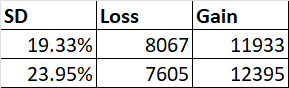

The larger the SD, the larger the possibility of loss or gains.

Generally speaking, the SD for mid and small-cap funds are higher compared to large-cap stocks.

Do note, volatility or Standard Deviation should not worry you. Markets are volatile, and equities are volatile, mutual funds are volatile; this is the very nature of markets. So if you can’t fathom watching your investment see-saw between gains and loss, then perhaps you should reconsider your investment decision in equities.

But if you do invest in equities, then you need to learn to manage volatility. There are two ways to deal with this beast called ‘Volatility’ –

- Diversify smartly (and not over diversify)
- Give your investment time

In [ ]:
sns.histplot(df['sd'])
plt.title('Distribution of SD')
plt.show()

In [ ]:
# sd vs category
sns.barplot(df,x='category',y='sd')
plt.title('Standard deviation variation across category')
plt.show()

Findings
- Equity has high SD means it is more volatile
- Debt has less SD means it is less volatile.

In [ ]:
# sd vs sub category
plt.figure(figsize=(10,8))
sns.barplot(df,y='sub_category',x='sd')
plt.title('Standard deviation variation across sub-category')
plt.show()

Findings
- FoFs Overseas has highest volatility and it should be invested for long duration.
- For short duration investment Liquid and Overnight funds are more suitable as they are less volatile.

In [ ]:
# sd vs risk
sns.barplot(df,y='risk_level',x='sd')
plt.title('Standard deviation variation across Risk Level')
plt.show()

Findings
- Very High risk category has high SD

In [ ]:
# sd vs rating
sns.barplot(df,x='rating',y='sd')
plt.title('Standard deviation variation across rating')
plt.show()

Findings
- Rating 0 and Rating 5 has most of the Equity Category hence higher SD

## Analysis of beta
Beta = Covariance between mutual fund and benchmark / Variance of benchmark index

A beta of 1 indicates that the mutual fund has the same level of volatility as the benchmark index. A beta of less than 1 indicates lower volatility, while a beta of greater than 1 indicates higher volatility.

For example, the Quant Small Cap Fund has a beta of 0.92, hence the fund is slightly less risky compared to its benchmark. I say slightly because it’s very close to 1. This implies,  if Nifty Small Cap 250 Index falls by  1%, then Quant Small Cap Fund is expected to fall by 0.92%.

If the beta was 0.6 or 0.65, the fund is less risk or less volatile compared to its benchmark. Why? Because if Nifty Small Cap 250 Index falls by  1%, then Quant Small Cap Fund is expected to fall by only 0.65% and not 0.95%.

This is what I mean by ‘relative risk’; it gives us a perspective of how risky the fund is compared to its benchmark.

When you are looking at the Beta of a stock or an MF, it is very important to recognize the fact that the beta is a measure of relative risk, it tells us how risky the stock or MF is compared to its benchmark. Beta is not an indicator of the inherent risk of the stock or MF.

To put this in context, think about it this way, Ferrari is faster compared to a BMW, this comparison is like the beta. We measure the speed of car one against car two. But does this give you any indication of how fast the Ferrari is? Not really.

Likewise, while beta gives us a perspective of the relative riskiness of an asset, it does not give us the absolute or the inherent risk of the asset itself.

By now, you must have built your perception of beta. Let me ask you this – if a mutual fund has a high beta, do you think it is bad?

Well, the good, bad, ugly part of beta depends on another metric called the ‘Alpha’.

To know more about Mutual Fund Metrics - refer to [Zerodha varsity](https://zerodha.com/varsity/chapter/mutual-fund-risk-metrics/)

In [ ]:
sns.histplot(df['beta'])
plt.title('Distribution of Beta')
plt.show()

In [ ]:
# category vs beta
sns.boxplot(df,x='category',y='beta')
plt.ylim(-5,5)
plt.title('Beta variation across category')
plt.show()

Findings
- Debt funds has negative beta it means when market will go down then returns for these funds will increase and vice versa.

In [ ]:
# equity mutual funds has high beta
sns.boxplot(equity_df,x='sub_category',y='beta',)
plt.xticks(rotation='vertical')
plt.ylim(0,2)
plt.title('Beta variation across Equity sub-category')
plt.show()

In [ ]:
# debt mutual funds has high beta variations

sns.boxplot(debt_df,x='sub_category',y='beta')
plt.xticks(rotation='vertical')
plt.ylim(-5,7)
plt.title('Beta variation across Debt sub-category')
plt.show()

In [ ]:
# beta vs risk
sns.barplot(df,y='risk_level',x='beta')
plt.title('Beta variation across Risk Level')
plt.show()

In [ ]:
# beta vs rating
sns.barplot(df,x='rating',y='beta')
plt.title('Beta variation across Rating')
plt.show()

## Analysis on Sharpe

Assume, there are two large-cap funds -Fund A and Fund B. Here is how they have performed in terms of returns –

Fund A – 14%

Fund B – 16%

Which of the two funds are better? Well, Fund B has a higher return, so without a doubt, Fund B is a better fund.

Now, consider the following –

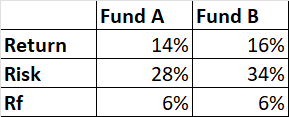

Rf is the risk-free return. Along with the fund’s return, I’ve also stated the standard deviation/volatility/risk of the two funds. Now, which of the two funds do you think is better?

I guess it gets a little complex to figure out which these two funds are better given that we have to evaluate them on two parameters, i.e. both the risk and return.

Ignoring the risk, purely on a return basis, Fund B is better. Ignoring the return, purely on a risk basis, Fund A is better. But in reality, you cannot isolate risk and reward; you need to factor in both these and figure out which of these two are better.

The Sharpe Ratio helps us here. It bundles the concept of risk, reward, and the risk-free rate and gives us a perspective.

Sharpe ratio = [Fund Return – Risk-Free Return]/Standard Deviation of the fund

Lets apply the math for Fund A –

= [14% – 6%] / 28%

= 8%/28%

= 0.29

The number tells us that the fund generates 0.29 units of return (over and above the risk-free return) for every unit of risk undertaken.Naturally, by this measure, the higher the Sharpe ratio, the better it is as we all want higher returns for every unit of risk undertaken.

Lets see how this turns out for Fund B –

= [16% – 6% ] / 34%

= 10% / 34%

= 0.29

So it turns out that both the funds are similar in terms of their risk and reward perspective. And there is no advantage of choosing Fund A over Fund B.

Do note, Sharpe ratio considers only price based risk. It does not consider credit or interest rate risk. Hence, there is no point looking at the Sharpe ratio for debt funds.

In [ ]:
sns.histplot(df['sharpe'])
plt.title('Distribution of Sharpe')
plt.show()

In [ ]:
# category vs sharpe
sns.barplot(df,x='category',y='sharpe')
plt.title('Variation of Sharpe ratio across category')
plt.show()

Findings
- Equity fund has highest Sharpe Ratio

In [ ]:
# sharpe vs risk
sns.barplot(df,y='risk_level',x='sharpe')
plt.title('Sharpe variation across risk level')
plt.show()

Findings
- Very High and Moderately High has somewhat same average Sharpe

In [ ]:
# sharpe vs rating
sns.barplot(df,x='rating',y='sharpe')
plt.title('Sharpe variation across rating')
plt.show()

Findings
- As rating increases sharpe ratio also increases

## Analysis on Sortino

The Sortino’s ratio is an improvisation over the Sharpe Ratio, wherein the denominator has only the negative returns or the ‘downside risk’, is considered.

Hence, the Sortino’s Ratio is –

= [Fund Return – Risk-Free Return]/Downside Risk

The objective of Sortino’s ratio is to estimate the excess return adjusted for only the downside risk. Like the Sharpe ratio, higher the Sortino’s ratio, better it is.

In [ ]:
sns.histplot(df['sortino'])
plt.title('Distribution of Sortino')
plt.show()

In [ ]:
# category vs sortino
sns.barplot(df,y='category',x='sortino')
plt.title('Variation of Sortino ratio across category')
plt.show()

Findings
- Equity has highest Sortino

In [ ]:
# sortino vs risk level
sns.barplot(df,y='risk_level',x='sortino')
plt.title('Sortino variation across risk level')
plt.show()

Findings
- Very High Risk category has high sortino

In [ ]:
# sortino vs rating
sns.barplot(df,x='rating',y='sortino')
plt.title('Sortino variation across rating')
plt.show()

Finding:
- Rating and sortino are positively correlated

In [ ]:
sns.histplot(df[df['returns_1yr']<30],x='returns_1yr',hue='category',kde=True)
plt.title('Distribution of 1 year returns across category')
plt.show()

Findings
- For 1 year investment Debt fund has performed well. Other category may give negative returns as well.

In [ ]:
sns.histplot(df,x='returns_3yr',hue='category',kde=True)
plt.title('Distribution of 3 year returns across category')
plt.show()

Findings
- Equity has outperformed every other category for 3 years performance.

In [ ]:
sns.histplot(df,x='returns_5yr',hue='category',kde=True)
plt.title('Distribution of 5 year returns across category')
plt.show()

Findings
- Equity has outperformed every other category for 5 years performance.

In [ ]:
# top schemes in each category and sub category in terms of returns earned

category_idx = df.groupby("category")["returns_5yr"].idxmax()
category_result = df.loc[category_idx, ["category", "scheme_name", "returns_5yr"]]

In [ ]:
category_result

In [ ]:
sub_cat_idx = df.groupby("sub_category")["returns_5yr"].idxmax()
sub_catresult = df.loc[sub_cat_idx, ["sub_category", "scheme_name", "returns_5yr"]]

In [ ]:
sub_catresult

This notebook is for Educational purpose only and one should check with there advisor before investing in mutual funds.